<a href="https://colab.research.google.com/github/prateeksab/housingprices/blob/main/Models_PS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/prateeksab/housingprices.git
%cd housingprices/Data
%ls

Cloning into 'housingprices'...
remote: Enumerating objects: 99, done.
remote: Counting objects: 100% (99/99), done.
remote: Compressing objects: 100% (91/91), done.
remote: Total 99 (delta 47), reused 21 (delta 7), pack-reused 0
Unpacking objects: 100% (99/99), done.
/content/housingprices/Data
Ames_data_8_4_21.csv           AmesHousing_update.csv
Ames_data_8_8_ps.csv           data_description.txt
AmesDummyData_8_4_21.csv       sample_submission.csv
AmesDummyData.csv              test.csv
Ames_dummy_UPDATE_8_10_21.csv  train.csv
AmesHousing.csv                updated_Ames_FE_8_10_21.csv


In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline
sns.set(style='ticks', palette='Set2')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv('updated_Ames_FE_8_10_21.csv', index_col=0)
df['remodeled'] = df['remodeled'].astype(int)

In [15]:
print(df.columns)
df = pd.get_dummies(df,drop_first=True)
df.head()

Index(['Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond',
       'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Total Bsmt SF',
       'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'SalePrice', 'remodeled',
       'Age', 'RemodelAge', 'total_other_rooms', 'outdoorspace', 'reg_lot_shp',
       'leveled_land', 'culdsac', '1fam_hm', 'unf_attic', 'hip_roof',
       'premium_ext', 'exclnt_extr', 'cblock_foundation', 'pconc_foundation',
       'other_foundation', 'exclnt_bsmt', 'bsmt_exosure', 'bsmt_finished',
       'bsmt_rec', 'excellent_heating', 'central_AC', 'kitchen_exclnt',
       'fireplace_exclnt', 'attached_garage', 'finsihed_garage', 'pave_drive',
       'normal_sale', 'vnr_brk', 'Log_SalePrice', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Nei

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Total Bsmt SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,SalePrice,remodeled,Age,RemodelAge,total_other_rooms,outdoorspace,reg_lot_shp,leveled_land,culdsac,1fam_hm,unf_attic,hip_roof,premium_ext,exclnt_extr,cblock_foundation,pconc_foundation,other_foundation,exclnt_bsmt,bsmt_exosure,bsmt_finished,bsmt_rec,excellent_heating,central_AC,kitchen_exclnt,fireplace_exclnt,attached_garage,finsihed_garage,pave_drive,normal_sale,vnr_brk,Log_SalePrice,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,141.0,31770,6,5,112.0,639.0,0.0,1080.0,0,1656,1.0,1,0,3,1,2,1960.0,2.0,528.0,215000,0,50,50,4,1,0,1,0,1,0,1,1,0,1,0,0,0,1,0,0,0,1,0,1,1,1,0,1,0,12.278393,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,80.0,11622,5,6,0.0,468.0,144.0,882.0,0,896,0.0,1,0,2,1,0,1961.0,1.0,730.0,105000,0,49,49,3,1,1,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,1,0,11.561716,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,81.0,14267,6,6,108.0,923.0,0.0,1329.0,0,1329,0.0,1,1,3,1,0,1958.0,1.0,312.0,172000,0,52,52,3,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,1,1,1,12.055250,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,93.0,11160,7,5,0.0,1065.0,0.0,2110.0,0,2110,1.0,2,1,3,1,2,1968.0,2.0,522.0,244000,0,42,42,5,0,1,1,0,1,0,1,1,1,1,0,0,0,0,1,0,1,1,1,0,1,1,1,1,0,12.404924,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,74.0,13830,5,5,0.0,791.0,0.0,928.0,0,1629,0.0,2,1,3,1,1,1997.0,2.0,482.0,189900,1,13,12,3,1,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,1,1,0,0,1,1,1,1,0,12.154253,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [116]:
df['Log_SalePrice'] = np.log(df['SalePrice'])
target = 'Log_SalePrice'
remove_features = ['Log_SalePrice','SalePrice']
features = []
# for i in df.columns:
#   if i!='SalePrice':
#     if i!= 'Log_SalePrice':
#       if i!='Neighborhood':
#         features.append(i)

for i in df.columns:
  if i not in remove_features:
    features.append(i)

#features = ['Age','Overall Qual','Lot Frontage','remodeled']
# Selected features are features which were selected post the test of multicollinearity. Features which failed the VIF test were removed
#selected_features = ['Lot Frontage','Lot Area','Mas Vnr Area','BsmtFin SF 1','BsmtFin SF 2','Low Qual Fin SF','Bsmt Full Bath','Half Bath','Fireplaces','remodeled',
#                      'outdoorspace','reg_lot_shp','culdsac','1fam_hm','unf_attic','hip_roof','premium_ext','exclnt_extr',
#                     'exclnt_bsmt','bsmt_exosure','bsmt_finished','bsmt_rec','excellent_heating','kitchen_exclnt','fireplace_exclnt','attached_garage',
#                     'finsihed_garage','normal_sale','vnr_brk']

selected_features_with_neighborhod = ['Lot Frontage','Lot Area','Mas Vnr Area','BsmtFin SF 1','BsmtFin SF 2','Low Qual Fin SF','Bsmt Full Bath','Half Bath','Fireplaces','remodeled','outdoorspace','reg_lot_shp','culdsac','unf_attic','hip_roof','premium_ext','exclnt_extr',
 'exclnt_bsmt','bsmt_exosure','bsmt_finished','bsmt_rec','excellent_heating','kitchen_exclnt','fireplace_exclnt','attached_garage','finsihed_garage','normal_sale',
 'vnr_brk','Neighborhood_Blueste','Neighborhood_BrDale','Neighborhood_BrkSide','Neighborhood_ClearCr','Neighborhood_CollgCr','Neighborhood_Crawfor','Neighborhood_Edwards',
 'Neighborhood_Gilbert','Neighborhood_Greens','Neighborhood_GrnHill','Neighborhood_IDOTRR','Neighborhood_Landmrk','Neighborhood_MeadowV','Neighborhood_Mitchel',
 'Neighborhood_NPkVill','Neighborhood_NWAmes','Neighborhood_NoRidge','Neighborhood_NridgHt','Neighborhood_SWISU','Neighborhood_Sawyer','Neighborhood_SawyerW',
 'Neighborhood_Somerst','Neighborhood_StoneBr','Neighborhood_Timber','Neighborhood_Veenker']

selected_features_with_neighborhod = ['Lot Frontage','Lot Area','Overall Qual','Overall Cond','Mas Vnr Area','BsmtFin SF 1','BsmtFin SF 2','Total Bsmt SF',
 'Low Qual Fin SF','Gr Liv Area','Bsmt Full Bath','Full Bath','Half Bath','Bedroom AbvGr','Kitchen AbvGr','Fireplaces','Garage Yr Blt','Garage Cars','Garage Area','remodeled','Age','RemodelAge','total_other_rooms','outdoorspace',
 'reg_lot_shp','leveled_land','culdsac','1fam_hm','unf_attic','hip_roof','premium_ext','exclnt_extr','exclnt_bsmt','bsmt_exosure','bsmt_finished','bsmt_rec','excellent_heating',
 'central_AC','kitchen_exclnt','fireplace_exclnt','attached_garage','finsihed_garage','pave_drive','normal_sale','vnr_brk','Neighborhood_Blueste','Neighborhood_BrDale','Neighborhood_BrkSide','Neighborhood_ClearCr',
 'Neighborhood_Crawfor','Neighborhood_Gilbert','Neighborhood_Greens','Neighborhood_GrnHill','Neighborhood_IDOTRR','Neighborhood_Landmrk','Neighborhood_MeadowV','Neighborhood_Mitchel','Neighborhood_NPkVill',
 'Neighborhood_NWAmes', 'Neighborhood_NoRidge','Neighborhood_NridgHt','Neighborhood_SWISU', 'Neighborhood_Sawyer','Neighborhood_SawyerW','Neighborhood_Somerst', 'Neighborhood_StoneBr',
 'Neighborhood_Timber', 'Neighborhood_Veenker']

selected_features_with_neighborhod= ['Lot Frontage','Lot Area','Mas Vnr Area',
 'BsmtFin SF 1','BsmtFin SF 2','Low Qual Fin SF','Bsmt Full Bath','Half Bath','Fireplaces','remodeled','RemodelAge','outdoorspace','reg_lot_shp','culdsac','unf_attic','hip_roof','premium_ext','exclnt_extr',
 'exclnt_bsmt','bsmt_exosure','bsmt_finished','bsmt_rec','excellent_heating','kitchen_exclnt','fireplace_exclnt','attached_garage','finsihed_garage','normal_sale',
  'vnr_brk','Neighborhood_Blueste','Neighborhood_BrDale','Neighborhood_BrkSide','Neighborhood_ClearCr','Neighborhood_Crawfor',
 'Neighborhood_Gilbert','Neighborhood_Greens','Neighborhood_GrnHill','Neighborhood_IDOTRR','Neighborhood_Landmrk','Neighborhood_MeadowV','Neighborhood_Mitchel','Neighborhood_NPkVill','Neighborhood_NWAmes',
 'Neighborhood_NoRidge','Neighborhood_NridgHt','Neighborhood_SWISU','Neighborhood_Sawyer','Neighborhood_SawyerW','Neighborhood_Somerst','Neighborhood_StoneBr','Neighborhood_Timber','Neighborhood_Veenker']
features = selected_features_with_neighborhod
#features

In [117]:
# assigning X & Y to features and target
X = df[features]
Y = df[target]

# Split the data into train and test pieces for both X and Y
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

In [118]:
# Linear regression
linear_regression_model = LinearRegression()
linear_regression_model.fit(X=X_train,y=Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [119]:
# Cross validation
scores = cross_val_score(linear_regression_model, X_train, Y_train,  cv=10)
print ("Cross Validated Accuracy: %0.3f +/- %0.3f" % (scores.mean(), scores.std()))

Cross Validated Accuracy: 0.758 +/- 0.055


In [120]:
Y_Pred = linear_regression_model.predict(X_test)

In [121]:
print("Root mean square: ",np.mean((Y_Pred - Y_test)**2))
sales_pred = np.exp(Y_Pred)
sales_test = np.exp(Y_test)
print("Root mean square: ",np.mean((sales_pred - sales_test)**2))

Root mean square:  0.0326468484338662
Root mean square:  1354552029.457055


In [122]:
mean_squared_error(y_true = Y_test,y_pred=Y_Pred)
mean_squared_error(y_true = sales_test,y_pred=sales_pred)

1354552029.4570558

In [123]:
# Using stats models
sm_model = sm.OLS(endog=Y_train,exog=X_train.astype(float)).fit()
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Log_SalePrice   R-squared (uncentered):                   0.978
Model:                            OLS   Adj. R-squared (uncentered):              0.977
Method:                 Least Squares   F-statistic:                              1832.
Date:                Thu, 12 Aug 2021   Prob (F-statistic):                        0.00
Time:                        21:23:25   Log-Likelihood:                         -4390.6
No. Observations:                2197   AIC:                                      8885.
Df Residuals:                    2145   BIC:                                      9181.
Df Model:                          52                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Lot Frontage             0.0165      0.001     13.042      0.000       0.014       0.019
Lot Area              3.844e-05   5.09e-06      7.559      0.000    2.85e-05    4.84e-05
Mas Vnr Area            -0.0004      0.000     -1.166      0.244      -0.001       0.000
BsmtFin SF 1             0.0001      0.000      0.915      0.360      -0.000       0.000
BsmtFin SF 2             0.0005      0.000      2.119      0.034    4.02e-05       0.001
Low Qual Fin SF          0.0020      0.001      2.337      0.020       0.000       0.004
Bsmt Full Bath           0.0754      0.104      0.722      0.470      -0.129       0.280
Half Bath                0.3174      0.088      3.614      0.000       0.145       0.490
Fireplaces              -0.2207      0.083     -2.646      0.008      -0.384      -0.057
remodeled                1.4083      0.087     16.121      0.000       1.237       1.580
RemodelAge               0.0820      0.002     34.558      0.000       0.077       0.087
outdoorspace             1.5080      0.111     13.579      0.000       1.290       1.726
reg_lot_shp              1.2454      0.092     13.466      0.000       1.064       1.427
culdsac                  1.2551      0.176      7.119      0.000       0.909       1.601
unf_attic                0.1420      0.347      0.409      0.683      -0.539       0.823
hip_roof                 0.3464      0.109      3.180      0.001       0.133       0.560
premium_ext              0.8380      0.102      8.246      0.000       0.639       1.037
exclnt_extr              0.2902      0.143      2.027      0.043       0.009       0.571
exclnt_bsmt              1.0279      0.125      8.249      0.000       0.784       1.272
bsmt_exosure             0.3454      0.107      3.234      0.001       0.136       0.555
bsmt_finished            0.4608      0.114      4.048      0.000       0.238       0.684
bsmt_rec                 0.4428      0.147      3.006      0.003       0.154       0.732
excellent_heating        1.0664      0.101     10.577      0.000       0.869       1.264
kitchen_exclnt           0.8398      0.124      6.762      0.000       0.596       1.083
fireplace_exclnt         0.0757      0.118      0.644      0.520      -0.155       0.306
attached_garage          1.0374      0.118      8.817      0.000       0.807       1.268
finsihed_garage          0.0031      0.118      0.027      0.979      -0.229       0.235
normal_sale              1.9006      0.098     19.348      0.000       1.708       2.093
vnr_brk                  0.4170      0.112      3.736      0.000       0.198       0.636
Neighborhood_Blueste     1.4985      0.620      2.418      0.016       0.283       2.714
Neighborhood_BrDale      3.0101      0.422     

# New Section

In [124]:
in_sample_r2 = linear_regression_model.score(X=X_train,y=Y_train)
print("In Sample R2: %0.3f" % (in_sample_r2))
out_of_sample_r2 = linear_regression_model.score(X=X_test,y=Y_test)
print("Out Of Sample R2: %0.3f" % out_of_sample_r2)

In Sample R2: 0.774
Out Of Sample R2: 0.788


In [125]:
# Calculating residuals
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

in_sample_residuals = calculate_residuals(linear_regression_model,X_train,Y_train)
out_sample_residuals = calculate_residuals(linear_regression_model,X_test,Y_test)


# Testing assumptions

# Linearity


Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


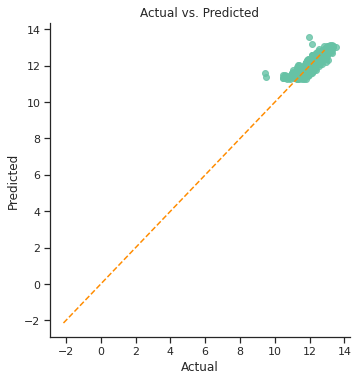

None
Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


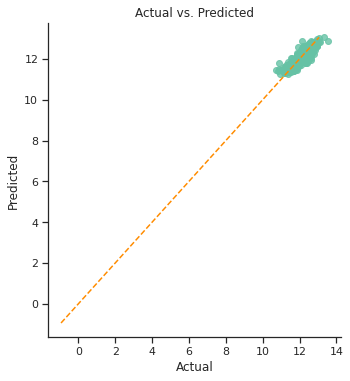

None


In [126]:
def linear_assumption(model, features, label):
    """
    Linearity: Assumes that there is a linear relationship between the predictors and
               the response variable. If not, either a quadratic term or another
               algorithm should be used.
    """
    print('Assumption 1: Linear Relationship between the Target and the Feature', '\n')
        
    print('Checking with a scatter plot of actual vs. predicted.',
           'Predictions should follow the diagonal line.')
    
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)
    
    # Plotting the actual vs predicted values
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, size=5)
        
    # Plotting the diagonal line
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()

in_sample_linearity = linear_assumption(linear_regression_model,X_train,Y_train)
print(in_sample_linearity)
out_sample_linearity = linear_assumption(linear_regression_model,X_test,Y_test)
print(out_sample_linearity)

# Testing Normality of residuals

In [127]:
def normal_errors_assumption(model, features, label, p_value_thresh=0.05):
    """
    Normality: Assumes that the error terms are normally distributed. If they are not,
    nonlinear transformations of variables may solve this.
               
    This assumption being violated primarily causes issues with the confidence intervals
    """
    from statsmodels.stats.diagnostic import normal_ad
    print('Assumption 2: The error terms are normally distributed', '\n')
    
    # Calculating residuals for the Anderson-Darling test
    df_results = calculate_residuals(model, features, label)
    
    print('Using the Anderson-Darling test for normal distribution')

    # Performing the test on the residuals
    p_value = normal_ad(df_results['Residuals'])[1]
    print('p-value from the test - below 0.05 generally means non-normal:', p_value)
    
    # Reporting the normality of the residuals
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')
    
    # Plotting the residuals distribution
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.distplot(df_results['Residuals'])
    plt.show()
    
    print()
    if p_value > p_value_thresh:
        print('Assumption satisfied')
    else:
        print('Assumption not satisfied')
        print()
        print('Confidence intervals will likely be affected')
        print('Try performing nonlinear transformations on variables')



Assumption 2: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.0
Residuals are not normally distributed


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


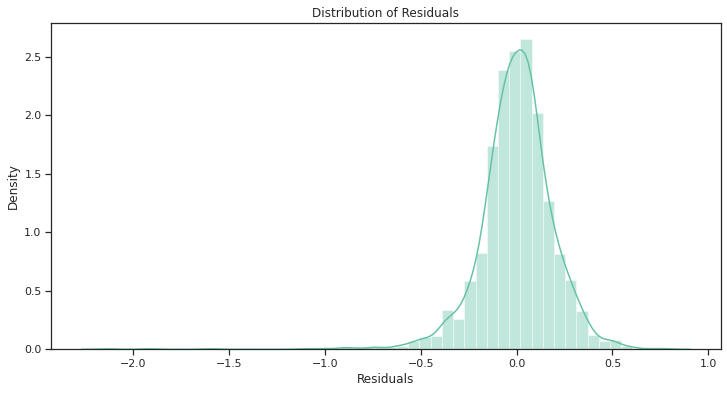


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables
Assumption 2: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 3.45916637328985e-08
Residuals are not normally distributed


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


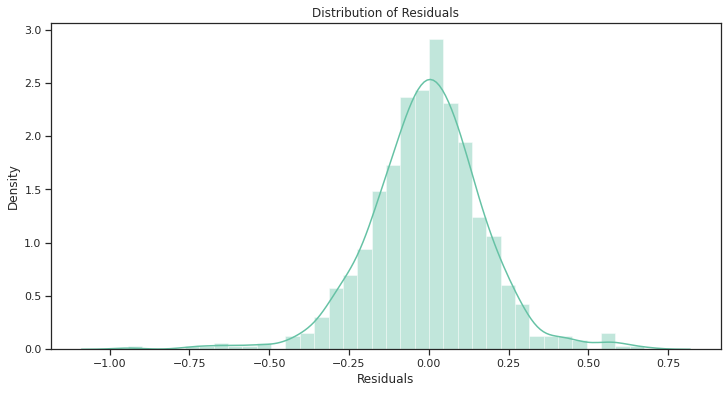


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables


In [128]:
in_sample_normality_errors = normal_errors_assumption(linear_regression_model,X_train,Y_train)
out_sample_normality_errors = normal_errors_assumption(linear_regression_model,X_test,Y_test)

# Multicollinearity assumption

In [129]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def multicollinearity_assumption(model, features, label, feature_names=None):
    """
    Multicollinearity: Assumes that predictors are not correlated with each other. If there is
                       correlation among the predictors, then either remove prepdictors with high
                       Variance Inflation Factor (VIF) values or perform dimensionality reduction
                           
                       This assumption being violated causes issues with interpretability of the 
                       coefficients and the standard errors of the coefficients.
    """
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    print('Assumption 3: Little to no multicollinearity among predictors')
        
    # Plotting the heatmap
    plt.figure(figsize = (40,40))
    feature_names = features.columns
    sns.heatmap(pd.DataFrame(features, columns=feature_names).corr(), annot=True)
    plt.title('Correlation of Variables')
    plt.show()
        
    print('Variance Inflation Factors (VIF)')
    print('> 10: An indication that multicollinearity may be present')
    print('> 100: Certain multicollinearity among the variables')
    print('-------------------------------------')
       
    # Gathering the VIF for each variable
    VIF = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    for idx, vif in enumerate(VIF):
        print('{0}: {1}'.format(feature_names[idx], vif))
        
    # Gathering and printing total cases of possible or definite multicollinearity
    possible_multicollinearity = sum([1 for vif in VIF if vif > 10])
    definite_multicollinearity = sum([1 for vif in VIF if vif > 100])
    print()
    print('{0} cases of possible multicollinearity'.format(possible_multicollinearity))
    print('{0} cases of definite multicollinearity'.format(definite_multicollinearity))
    print()

    if definite_multicollinearity == 0:
        if possible_multicollinearity == 0:
            print('Assumption satisfied')
        else:
            print('Assumption possibly satisfied')
            print()
            print('Coefficient interpretability may be problematic')
            print('Consider removing variables with a high Variance Inflation Factor (VIF)')

    else:
        print('Assumption not satisfied')
        print()
        print('Coefficient interpretability will be problematic')
        print('Consider removing variables with a high Variance Inflation Factor (VIF)')

Assumption 3: Little to no multicollinearity among predictors


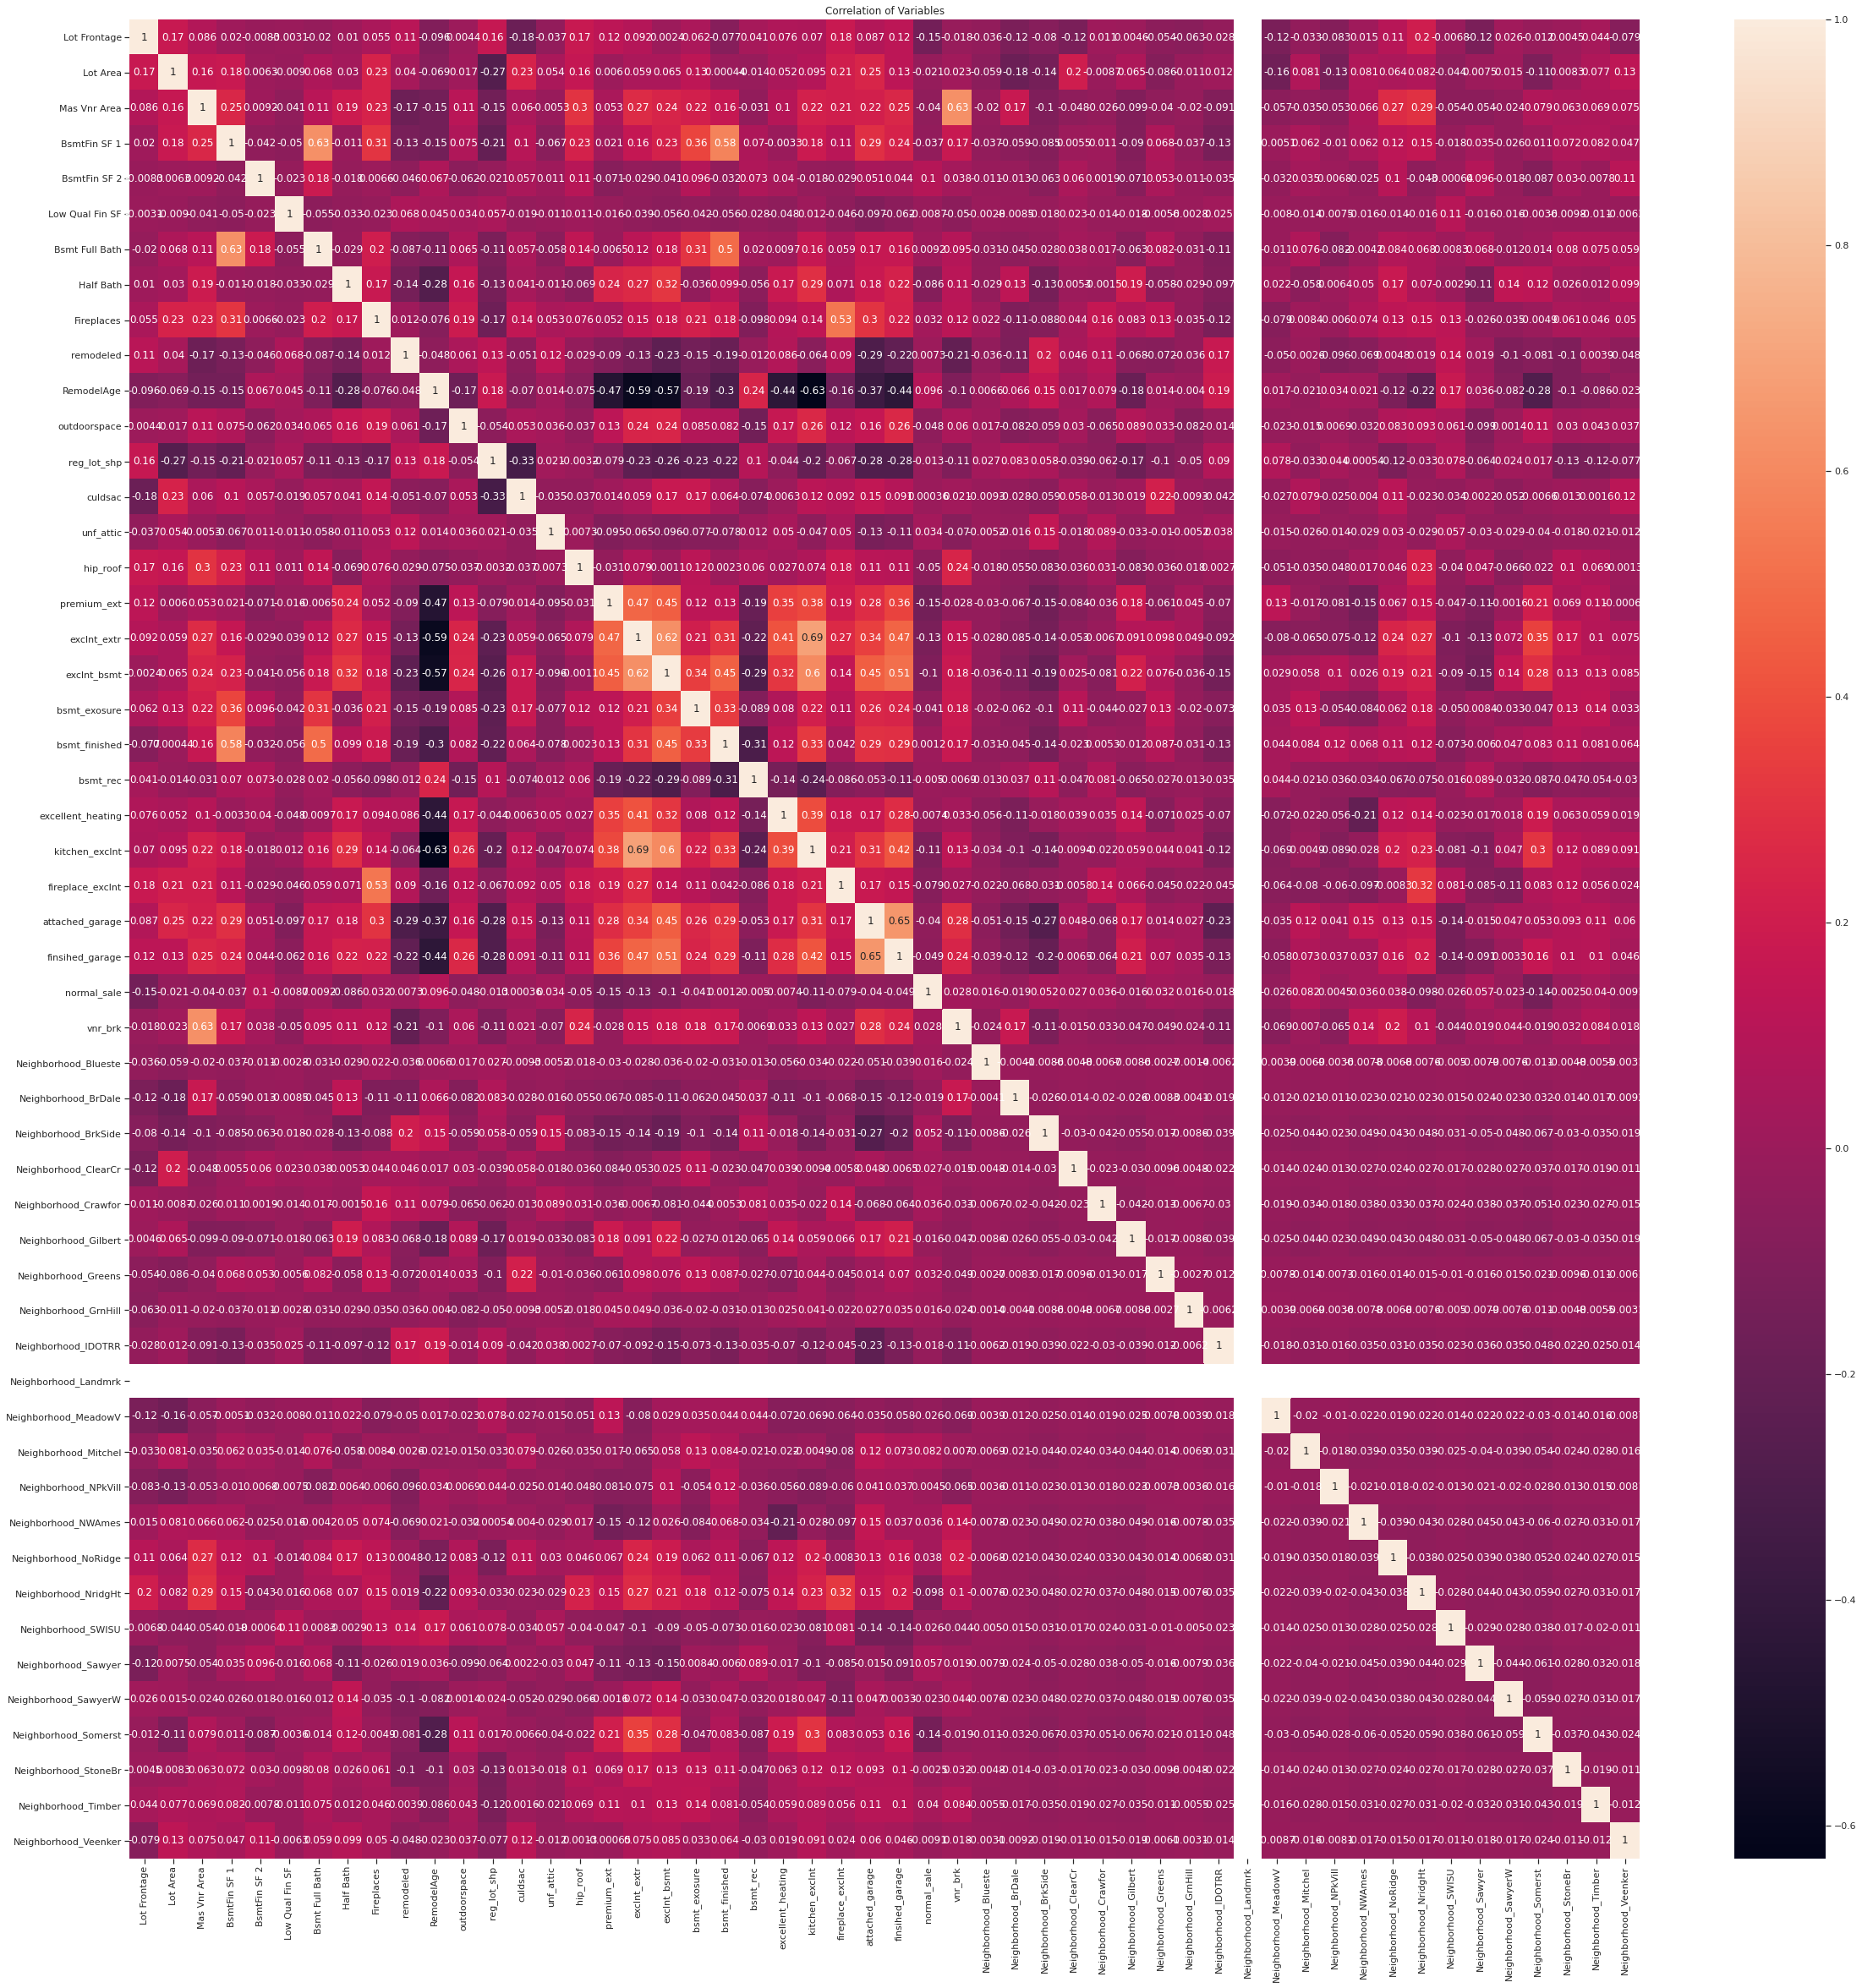

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
Lot Frontage: 5.287713226400948
Lot Area: 7.113965050680983
Mas Vnr Area: 3.0067426627972
BsmtFin SF 1: 5.33519086527408
BsmtFin SF 2: 1.3436327380242477
Low Qual Fin SF: 1.0495709779745828
Bsmt Full Bath: 3.408418849677539
Half Bath: 2.2728785077064106
Fireplaces: 3.822920852819002
remodeled: 2.789497478735828
RemodelAge: 4.7737231909461375
outdoorspace: 6.8555798965191155
reg_lot_shp: 3.9576866207464905
culdsac: 1.4380189478670373
unf_attic: 1.1260579957439085
hip_roof: 1.6757868300842074
premium_ext: 2.9400841306744603
exclnt_extr: 4.782919684069649
exclnt_bsmt: 6.082601041396126
bsmt_exosure: 2.0225703142076434
bsmt_finished: 4.250290621241942
bsmt_rec: 1.6179120517492591
excellent_heating: 4.855711240120715
kitchen_exclnt: 4.610719037178447
fireplace_exclnt: 2.6269602401673837
attached_garage: 6.916121

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [130]:
in_sample_multicollinearity = multicollinearity_assumption(linear_regression_model,X_test,Y_test)

In [131]:
X_train.values

array([[   63.,  7584.,    88., ...,     0.,     0.,     0.],
       [   60.,  7200.,   180., ...,     0.,     0.,     0.],
       [   80.,  9760.,   218., ...,     0.,     0.,     0.],
       ...,
       [   70., 10500.,    82., ...,     0.,     0.,     0.],
       [  100., 15263.,    90., ...,     0.,     0.,     0.],
       [   60., 10284.,     0., ...,     0.,     0.,     0.]])

In [132]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values,i) for i in range(len(X_train.columns))]
x = [variance_inflation_factor(X_train.values,i) for i in range(len(X_train.columns))]
x

[4.787270437684372,
 3.144172598133571,
 2.9525275321365982,
 5.216599618740538,
 1.3264070985580987,
 1.081687927335981,
 3.4065799713088123,
 2.027679224081892,
 3.6228473104152816,
 2.3448241421418756,
 4.119116488527892,
 6.940678057358601,
 3.6340995269735203,
 1.2948451300080654,
 1.0708800937347733,
 1.4865123961032098,
 2.9867995851894933,
 5.199142296537444,
 5.328109287748971,
 1.8552809367966898,
 3.8903562136815713,
 1.3495440906769898,
 4.556302444839319,
 4.881413812148233,
 2.4941047193305343,
 6.239413902358488,
 4.956357447808091,
 5.3123037327845735,
 2.6062453361724187,
 1.059285544124068,
 1.1437277305343871,
 1.1969367877949946,
 1.1955958770811668,
 1.220684940569024,
 1.5151613910580584,
 1.0540508450220247,
 1.014526185570711,
 1.1873074273329014,
 1.0142902110186631,
 1.161118137156135,
 1.1656752552930325,
 1.127471830254479,
 1.3001611800552777,
 1.3424403005123227,
 1.7906834057096226,
 1.113765883482388,
 1.1755744799945915,
 1.2626008765707128,
 1.48346090

In [133]:
vif_data['Acceptable'] = vif_data['VIF'].apply(lambda x: 1 if x<10 else 0)
vif_data.sort_values(by='Acceptable',ascending=True)
features_to_remove = vif_data[vif_data['Acceptable'] == 0]['feature']

features_to_remove.values
#vif_data.head(68)

array([], dtype=object)

In [134]:
# new_features were posted as selected_features
new_features = features
for element in features_to_remove:
  if element in new_features:
    new_features.remove(element)
new_features

['Lot Frontage',
 'Lot Area',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Low Qual Fin SF',
 'Bsmt Full Bath',
 'Half Bath',
 'Fireplaces',
 'remodeled',
 'RemodelAge',
 'outdoorspace',
 'reg_lot_shp',
 'culdsac',
 'unf_attic',
 'hip_roof',
 'premium_ext',
 'exclnt_extr',
 'exclnt_bsmt',
 'bsmt_exosure',
 'bsmt_finished',
 'bsmt_rec',
 'excellent_heating',
 'kitchen_exclnt',
 'fireplace_exclnt',
 'attached_garage',
 'finsihed_garage',
 'normal_sale',
 'vnr_brk',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Gilbert',
 'Neighborhood_Greens',
 'Neighborhood_GrnHill',
 'Neighborhood_IDOTRR',
 'Neighborhood_Landmrk',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neig

In [95]:
# Building model with new_features only
